In [39]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



%load_ext autoreload
%autoreload 2
%matplotlib inline
if os.name == 'posix':
    %config InlineBackend.figure_format = 'retina' #retina display settings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


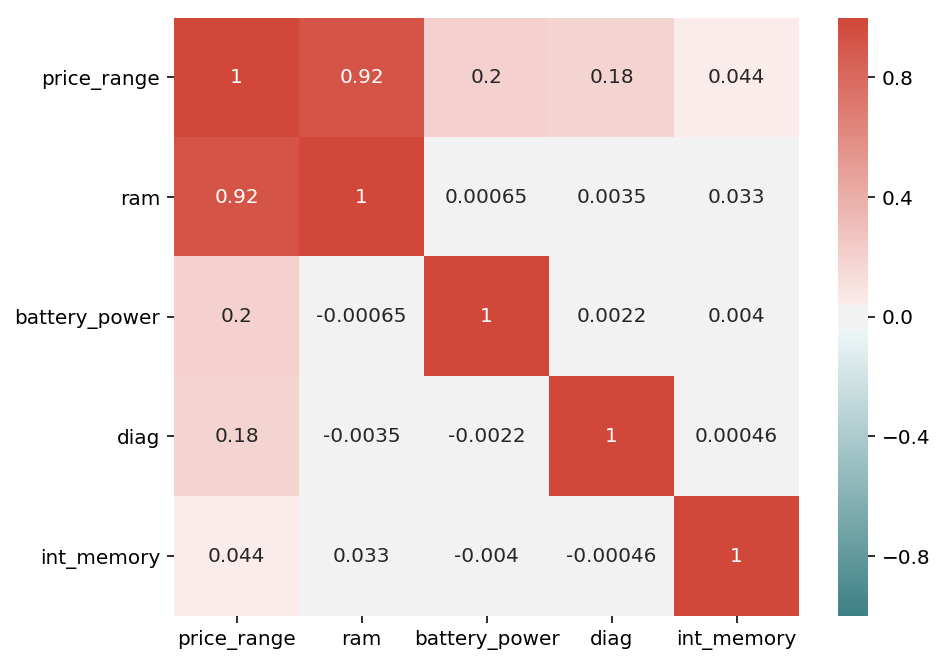

In [26]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df['diag'] = np.sqrt(df.px_height**2 + df.px_width**2)
df = df.drop(['px_width', 'px_height'], axis=1)

int_cols = df.corr().loc['price_range'].abs().sort_values(ascending=False)[:5].index


corr = df[int_cols].corr()
corr.values[np.triu_indices_from(corr)] = np.abs(corr.values[np.triu_indices_from(corr)] )

fig = plt.figure(figsize=(7, 5.5))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(200, 15, as_cmap=True), vmin=-1, vmax=1)

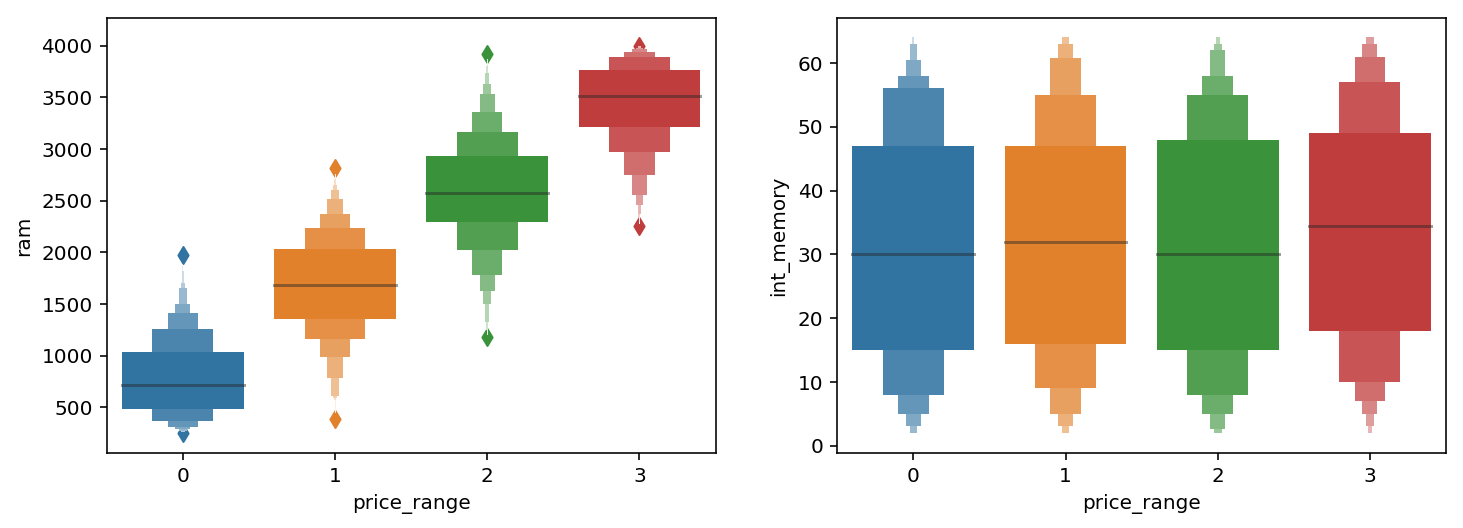

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.boxenplot(x="price_range", y="ram", data=df, ax=ax1)
sns.boxenplot(x="price_range", y="int_memory", data=df, ax=ax2)

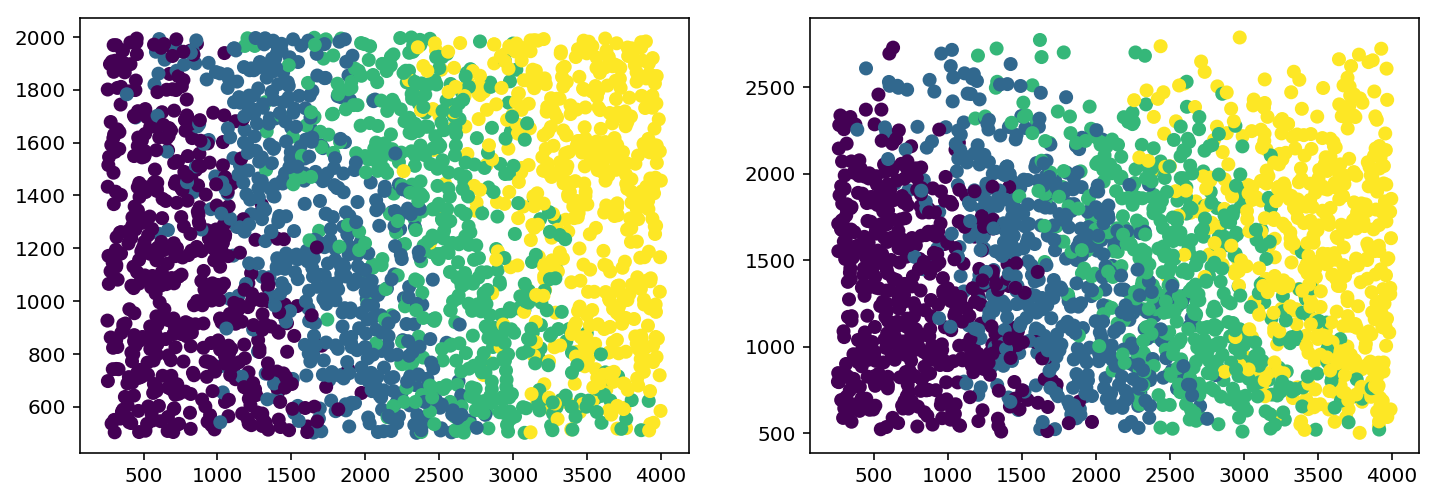

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.scatter(df.ram, df.battery_power, c=df.price_range)
ax2.scatter(df.ram, df.diag, c=df.price_range)

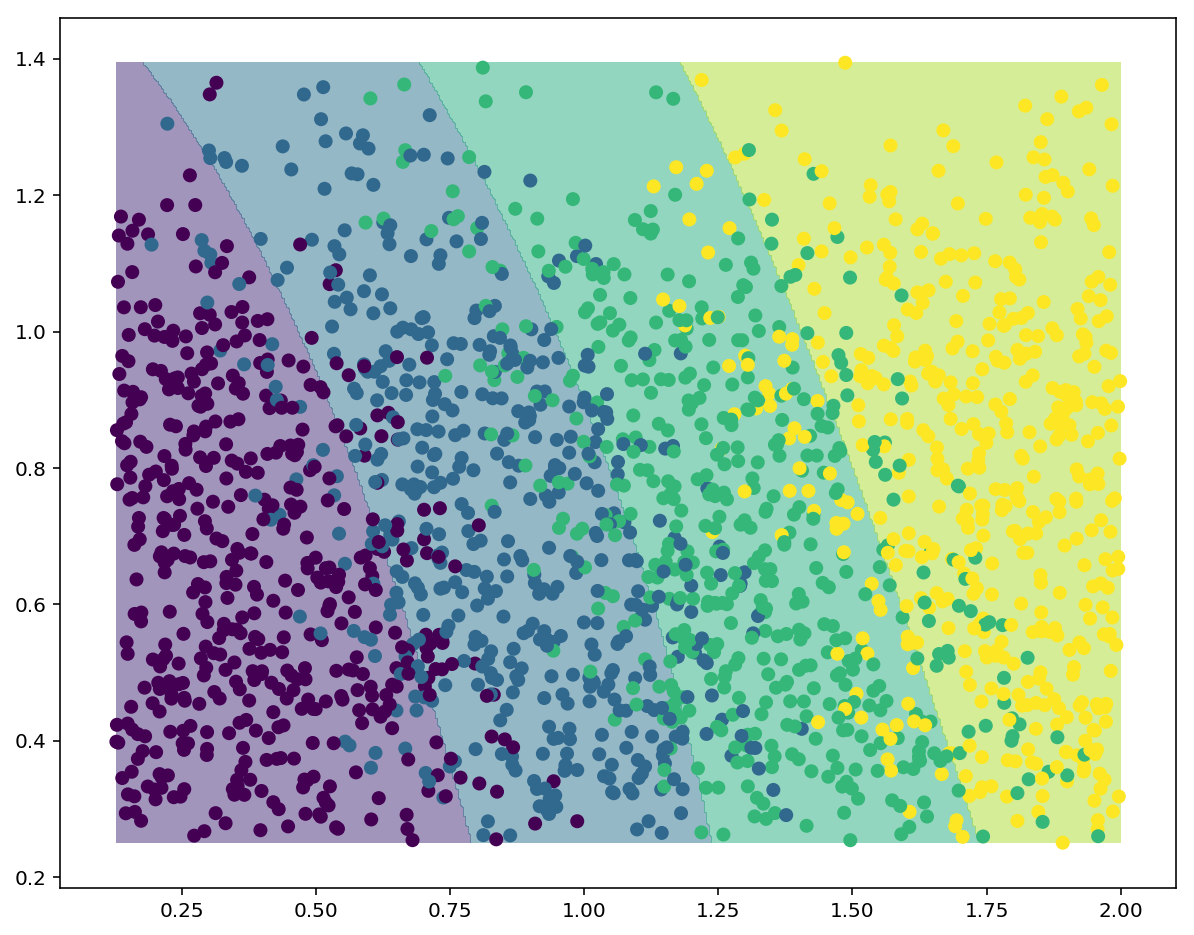

In [58]:
clf = svm.SVC(kernel='poly', degree=10, gamma=1., C=0.1)
clf = svm.SVC(kernel='rbf', gamma=1., C=1)

X = df[['diag', 'ram']].values.astype('float')
y = df[['price_range']].values.ravel()

X = X/2000

clf.fit(X, y)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(),X[:, 0].max(), 400), np.linspace(X[:, 1].min(), X[:, 1].max(), 400))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
fig, ax = plt.subplots(1, figsize=(10, 8))
out = plt.contourf(yy, xx, Z, 3,alpha=.5, cmap='viridis')
plt.scatter(df.ram/2000, df.diag/2000, c=df.price_range)

0.7929999999999999

In [86]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df['diag'] = np.sqrt(df.px_height**2 + df.px_width**2)
df = df.drop(['px_width', 'px_height'], axis=1)


clf = svm.SVC(kernel='poly', degree=1, gamma=1., C=1)
clf = svm.SVC(kernel='rbf', gamma=.1, C=10)


MAX_INT = 3
int_cols = df.corr().loc['price_range'].abs().sort_values(ascending=False)[1:MAX_INT+1].index
print(f'Using {int_cols}')

X = df[int_cols].values.astype('float')
y = df[['price_range']].values.ravel()

x_mean = np.array([2.12421300e+03, 1.23851850e+03, 1.44464059e+03, 3.20465000e+01,
       5.76700000e+00, 9.91650000e+00, 5.03000000e-01, 1.40249000e+02,
       7.61500000e-01, 1.23065000e+01, 4.30950000e+00, 1.10110000e+01,
       4.95000000e-01, 5.07000000e-01, 5.09500000e-01, 5.21500000e-01,
       1.52225000e+00, 4.52050000e+00, 5.01750000e-01])[:MAX_INT]
x_std = np.array([1.08446083e+03, 4.39308338e+02, 5.28218549e+02, 1.81411780e+01,
       4.35530837e+00, 6.06279867e+00, 4.99991000e-01, 3.53908039e+01,
       4.26166341e-01, 4.21219156e+00, 4.34035825e+00, 5.46258904e+00,
       4.99974999e-01, 4.99950998e-01, 4.99909742e-01, 4.99537536e-01,
       8.15800182e-01, 2.28726469e+00, 2.88343437e-01])[:MAX_INT]
X = (X-x_mean)/x_std
clf.fit(X, y)

predicted_y = clf.predict(X)

print(f'Using all dataset: {accuracy_score(predicted_y, y)}')
print(f'Using cross validation: {cross_val_score(clf, X, y, cv=5).mean()}')


Using Index(['ram', 'battery_power', 'diag'], dtype='object')
Using all dataset: 0.945
Using cross validation: 0.938
